<a href="https://colab.research.google.com/github/mangleshpatidar/DO101-apps/blob/master/NaiveBayes%26ClusteringOnSentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SMAI Assignment - 2

## Question 1: Naive Bayes and Clustering

### Part 1: Naive Bayes

[Files](https://drive.google.com/drive/folders/1OUVrOMp2jSSBDJSqvEyXDFTrhiyZnqit?usp=sharing)

You will be performing Sentiment Analysis on a product review dataset with reviews from customers and star rating belonging to four classes (1,2,4,5). You can use sklearn for this question. Your tasks are as follows:

1.   Clean the text by removing punctations and preprocess them using techniques such as stop word removal, stemming etc. You can explore anything!
1.  Create BoW features using the word counts. You can choose the words that form the features such that the performance is optimised. Use the train-test split provided in `train_test_index.pickle` and report any interesting observations based on metrics such as accurarcy, precision, recall and f1 score (You can use Classification report in sklearn).
1. Repeat Task 2 with TfIdf features.

In [ ]:
import pandas as pd
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:

with open('train_test_index.pickle', 'rb') as handle:
    train_test_index_dict = pickle.load(handle)

In [ ]:
import pandas as pd

data = pd.read_csv('product_reviews.csv')
data.head(10)

,text,stars,sentiment
0,Total bill for this horrible service? Over $8G...,1.0,0
1,Went in for a lunch. Steak sandwich was delici...,5.0,1
2,This place has gone down hill. Clearly they h...,1.0,0
3,"Walked in around 4 on a Friday afternoon, we s...",1.0,0
4,Michael from Red Carpet VIP is amazing ! I rea...,4.0,1
5,You can't really find anything wrong with this...,5.0,1
6,Great lunch today. Staff was very helpful in a...,4.0,1
7,We've been a huge Slim's fan since they opened...,5.0,1
8,"Our family LOVES the food here. Quick, friendl...",5.0,1
9,The food is always good and the prices are rea...,4.0,1


In [ ]:
# Define preprocessing function
def preprocess_text(text):
    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    # Stemming
    stemmer = PorterStemmer()
    text = ' '.join([stemmer.stem(word) for word in text.split()])
    return text

In [ ]:
# Apply preprocessing to the 'review' column
data['text'] = data['text'].apply(preprocess_text)
print(data['text'])

0        total bill horribl servic 8g crook actual nerv...
1        went lunch steak sandwich delici caesar salad ...
2        place gone hill clearli cut back staff food qu...
3        walk around 4 friday afternoon sat tabl bar wa...
4        michael red carpet vip amaz reach need help pl...
                               ...                        
26656    save money dont go place stuck went walk entir...
26657    husband thought would give sushi anoth tri sto...
26658    petit café sympa peu de place assis bonn bouff...
26659    absolut delici food full amaz flavor owner qui...
26660    best place sport event servic locat amaz great...
Name: text, Length: 26661, dtype: object


In [ ]:
# Create bag-of-words features using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['text'])
y = data['stars']
print(train_test_index_dict.keys())


dict_keys(['train_index', 'test_index'])


In [ ]:
# Split the data into train and test sets using provided indices
X_train = X[train_test_index_dict['train_index']]
X_test = X[train_test_index_dict['test_index']]
y_train = y[train_test_index_dict['train_index']]
y_test = y[train_test_index_dict['test_index']]

In [ ]:
# Train the Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

In [ ]:
# Evaluate the classifier
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.73      0.78      0.75      1149
         2.0       0.35      0.05      0.09       587
         4.0       0.47      0.54      0.50      1981
         5.0       0.80      0.83      0.81      5082

    accuracy                           0.70      8799
   macro avg       0.59      0.55      0.54      8799
weighted avg       0.69      0.70      0.69      8799



In [ ]:
# Create TF-IDF features using TfidfVectorizer
vectorizer = TfidfVectorizer()
X1 = vectorizer.fit_transform(data['text'])
y1 = data['stars']

In [ ]:
# Split the data into train and test sets using provided indices
X_train1 = X1[train_test_index_dict['train_index']]
X_test1 = X1[train_test_index_dict['test_index']]
y_train1 = y1[train_test_index_dict['train_index']]
y_test1 = y1[train_test_index_dict['test_index']]

In [ ]:
# Train the Naive Bayes classifier
clf_tfidf = MultinomialNB()
clf_tfidf.fit(X_train1, y_train1)

# Make predictions on the test set
y_pred1 = clf_tfidf.predict(X_test1)

In [ ]:
# Evaluate the classifier
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

         1.0       0.91      0.03      0.05      1149
         2.0       0.50      0.00      0.00       587
         4.0       0.51      0.01      0.02      1981
         5.0       0.58      1.00      0.73      5082

    accuracy                           0.58      8799
   macro avg       0.63      0.26      0.20      8799
weighted avg       0.60      0.58      0.44      8799



### Part 2: Clustering

You will be performing kmeans clustering on the same product reviews dataset from Part 1. In this question, instead of statistically computing features, you will use the embeddings obtained from a neural sentiment analysis model (huggingface: siebert/sentiment-roberta-large-english).

You can use sklearn for this question. Your tasks are as follows:


1. Perform kmeans clustering using sklearn. Try various values for number of clusters (k) and plot the elbow curve. For each value of k, plot WCSS (Within-Cluster Sum of Square). WCSS is the sum of the squared distance between each point and the centroid in a cluster.
1. Perform task 1 with cluster initialisation methods [k-means++, forgy ("random" in sklearn)].
1. In this case, since the ground truth labels (star rating) are available we can evaluate the clustering using metrics like purity, nmi and rand score. Implement these metrics from scratch and evaluate the clustering. [Reference](https://nlp.stanford.edu/IR-book/html/htmledition/evaluation-of-clustering-1.html)

In [ ]:
import gzip
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the embeddings
f = gzip.GzipFile('roberta_embeds.npy.gz', "r")
embeds = np.load(f)
print(embeds.shape)

(26661, 1024)


In [ ]:
import pandas as pd

data = pd.read_csv('product_reviews.csv')
data.head(10)
# Separate the predictor variable (X) and the target variable (y)
# Extract input data and ground truth labels
X = data['text']  # Input data
true_labels = data['stars']  # Ground truth labels

In [ ]:

with open('train_test_index.pickle', 'rb') as handle:
    train_test_index_dict = pickle.load(handle)

In [ ]:
def calculate_wcss(X, centroids, labels):
    """
    Calculate the Within-Cluster Sum of Squares (WCSS) using Euclidean distance.

    Parameters:
    - X: Data points (numpy array).
    - centroids: Centroids of clusters (numpy array).
    - labels: Labels of data points indicating cluster assignments (numpy array).

    Returns:
    - wcss: Within-Cluster Sum of Squares.
    """
    wcss = 0
    for i in range(len(centroids)):
        cluster_points = X[labels == i]
        centroid = centroids[i]
        wcss += np.sum((cluster_points - centroid) ** 2)
    return wcss

In [ ]:
k_values = range(2, 15)

wcss_kmeans_pp = []
wcss_random = []
for k in k_values:
    kmeans_pp = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans_pp.fit(embeds)
    wcss_kmeans_pp.append(kmeans_pp.inertia_)
    #wcss_kmeans_pp.append(calculate_wcss(embeds, kmeans_pp.cluster_centers_, kmeans_pp.labels_))

    # KMeans with random initialization
    kmeans_random = KMeans(n_clusters=k, init='random', random_state=42, n_init=10)
    kmeans_random.fit(embeds)
    wcss_random.append(kmeans_random.inertia_)
    #wcss_random.append(calculate_wcss(embeds, kmeans_random.cluster_centers_, kmeans_random.labels_))




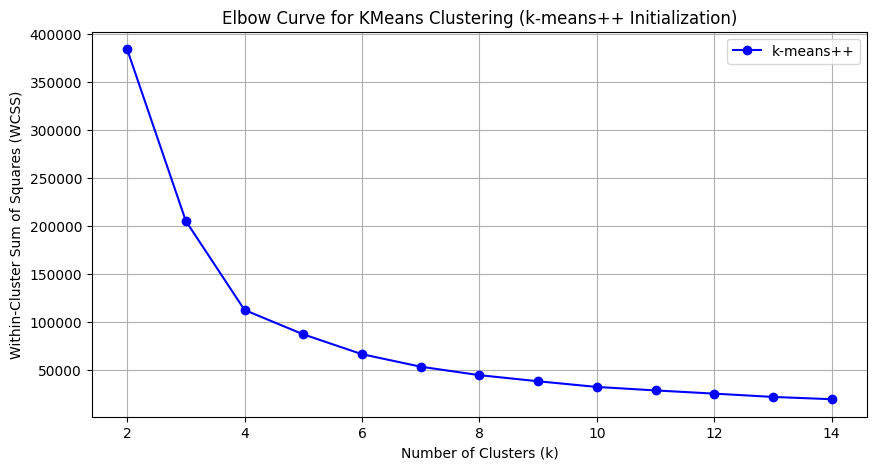

In [ ]:
import matplotlib.pyplot as plt

# Plot the elbow curve for KMeans++ initialization
plt.figure(figsize=(10, 5))
plt.plot(k_values, wcss_kmeans_pp, marker='o', linestyle='-', color='b', label='k-means++')
plt.title('Elbow Curve for KMeans Clustering (k-means++ Initialization)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.legend()
plt.grid(True)
plt.show()



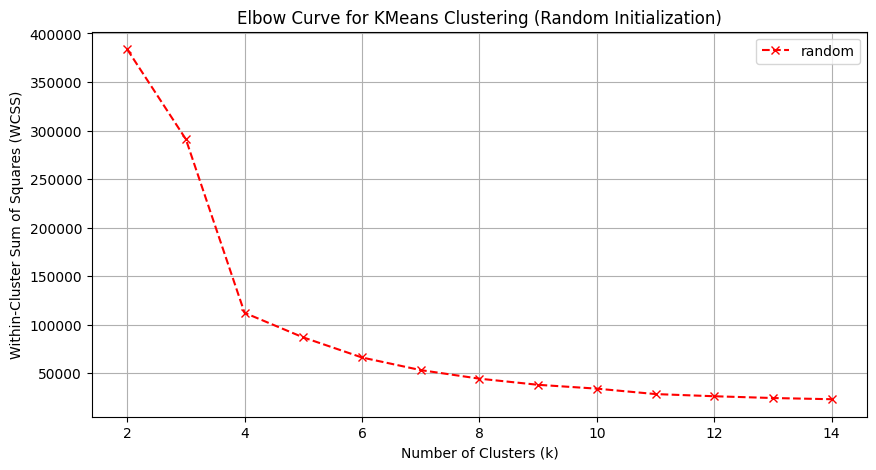

In [ ]:
# Plot the elbow curve for random initialization
plt.figure(figsize=(10, 5))
plt.plot(k_values, wcss_random, marker='x', linestyle='--', color='r', label='random')
plt.title('Elbow Curve for KMeans Clustering (Random Initialization)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
from collections import Counter
from math import log

def compute_purity(true_labels, predicted_labels):
    contingency_matrix = np.zeros((len(np.unique(true_labels)), len(np.unique(predicted_labels))))

    for i, true_label in enumerate(np.unique(true_labels)):
        for j, predicted_label in enumerate(np.unique(predicted_labels)):
            contingency_matrix[i, j] = np.sum((true_labels == true_label) & (predicted_labels == predicted_label))

    return np.sum(np.amax(contingency_matrix, axis=0)) / len(true_labels)

def compute_nmi(true_labels, predicted_labels):
    contingency_matrix = np.zeros((len(np.unique(true_labels)), len(np.unique(predicted_labels))))

    for i, true_label in enumerate(np.unique(true_labels)):
        for j, predicted_label in enumerate(np.unique(predicted_labels)):
            contingency_matrix[i, j] = np.sum((true_labels == true_label) & (predicted_labels == predicted_label))


    p_true = np.sum(contingency_matrix, axis=1) / np.sum(contingency_matrix)
    p_predicted = np.sum(contingency_matrix, axis=0) / np.sum(contingency_matrix)


    mi = 0
    for i in range(len(np.unique(true_labels))):
        for j in range(len(np.unique(predicted_labels))):
            if contingency_matrix[i, j] != 0:
                mi += (contingency_matrix[i, j] / np.sum(contingency_matrix)) * log((contingency_matrix[i, j] / np.sum(contingency_matrix)) / (p_true[i] * p_predicted[j]))

    h_true = - np.sum(p_true * np.log(p_true))
    h_predicted = - np.sum(p_predicted * np.log(p_predicted))


    nmi = mi / np.sqrt(h_true * h_predicted)

    return nmi

def compute_ari(true_labels, predicted_labels):
    contingency_matrix = np.zeros((len(np.unique(true_labels)), len(np.unique(predicted_labels))))

    for i, true_label in enumerate(np.unique(true_labels)):
        for j, predicted_label in enumerate(np.unique(predicted_labels)):
            contingency_matrix[i, j] = np.sum((true_labels == true_label) & (predicted_labels == predicted_label))

    a = np.sum(np.square(np.sum(contingency_matrix, axis=1)))
    b = np.sum(np.square(np.sum(contingency_matrix, axis=0)))
    c = np.sum(np.square(contingency_matrix))
    d = np.sum(contingency_matrix) ** 2

    expected_index = (a * b) / d
    maximum_index = (a + b) / 2

    return (c - expected_index) / (maximum_index - expected_index)

kmeans_pp = KMeans(n_clusters=4, init='k-means++', random_state=42, n_init=10)
predicted_labels_pp = kmeans_pp.fit_predict(embeds)


purity_pp = compute_purity(true_labels, predicted_labels_pp)
nmi_pp = compute_nmi(true_labels, predicted_labels_pp)
ari_pp = compute_ari(true_labels, predicted_labels_pp)

print("Evaluation Metrics for KMeans with k-means++ initialization:")
print("Purity:", purity_pp)
print("NMI:", nmi_pp)
print("Rand Score:", ari_pp)

kmeans_random = KMeans(n_clusters=4, init='random', random_state=42, n_init=10)
predicted_labels_random = kmeans_random.fit_predict(embeds)


purity_random = compute_purity(true_labels, predicted_labels_random)
nmi_random = compute_nmi(true_labels, predicted_labels_random)
ari_random = compute_ari(true_labels, predicted_labels_random)

print("\nEvaluation Metrics for KMeans with random initialization:")
print("Purity:", purity_random)
print("NMI:", nmi_random)
print("Rand Score:", ari_random)


Evaluation Metrics for KMeans with k-means++ initialization:
Purity: 0.7132140579873223
NMI: 0.5358546011063247
Rand Score: 0.4815465548243637

Evaluation Metrics for KMeans with random initialization:
Purity: 0.7132140579873223
NMI: 0.5358546011063245
Rand Score: 0.4815465548243637
